In [2]:
import pandas as pd
import numpy as np

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
stocks = input('Enter a stock code:') # here paste the code copied from yahoo finance page for a specific product 
data = yf.download(stocks,auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2019-09-16,9.65,9.76,9.65,9.76,600
2019-09-17,9.76,9.76,9.76,9.76,0
2019-09-18,9.69,9.72,9.69,9.72,200
2019-09-19,9.72,9.72,9.72,9.72,0
2019-09-20,9.84,9.85,9.84,9.85,900


In [18]:
data.shape

(438, 5)

In [19]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 438 entries, 2019-09-16 to 2021-09-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    438 non-null    float64
 1   High    438 non-null    float64
 2   Low     438 non-null    float64
 3   Close   438 non-null    float64
 4   Volume  438 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 20.5 KB


In [20]:
data.describe()

,Open,High,Low,Close,Volume
count,438.000000,438.000000,438.000000,438.000000,4.380000e+02
mean,19.467849,20.039596,18.757473,19.393450,3.137358e+06
std,10.736489,11.280412,10.027626,10.644340,3.920945e+06
min,9.380000,9.380000,9.380000,9.380000,0.000000e+00
25%,9.920000,9.940000,9.920000,9.922500,1.975000e+04
50%,15.110000,15.447000,14.475000,15.095000,2.032550e+06
75%,26.637500,27.545000,25.102500,26.152500,5.156025e+06
max,49.080002,49.480000,45.125000,46.099998,2.822860e+07


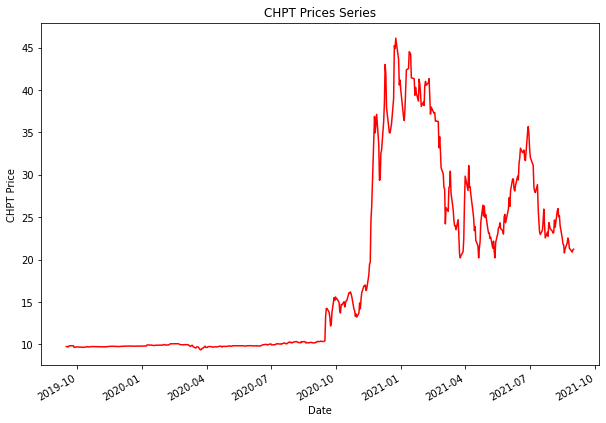

In [27]:
data.Close.plot(figsize=(10,7),color='r')
plt.ylabel('{} Price'.format(stocks))
plt.title('{} Prices Series'.format(stocks))
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

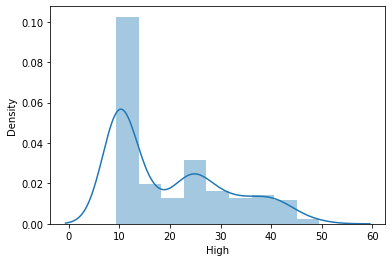

In [30]:
sns.distplot(data['High'])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

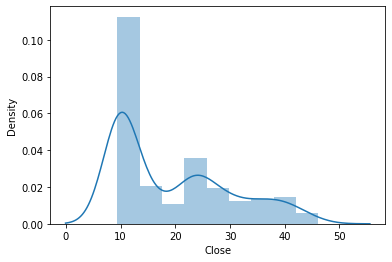

In [31]:
sns.distplot(data['Close'])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

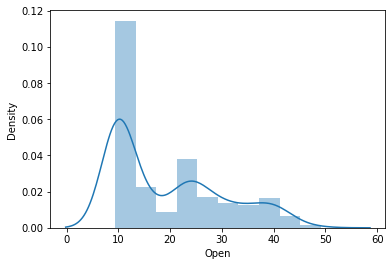

In [32]:
sns.distplot(data['Open'])

In [35]:
X = data.drop("Close",axis=1)
y = data['Close']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=0)

In [37]:
print(data.shape )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(438, 5)
(350, 4)
(88, 4)
(350,)
(88,)


In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error,r2_score # r2_score should be abroximately 1 to be a good model

def calculate_metrics(y_test,pred): # helper function
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test,pred)

    print('mse:',mse)
    print('rmse:',rmse)
    print('r2_score:',r2_scors)

calculate_metrics(y_test,pred)    


mse: 0.13710187450755643
rmse: 0.37027270289282255
r2_score: 0.9986528412054755


In [50]:
from sklearn.linear_model import Lasso,Ridge

la = Lasso().fit(X_train,y_train)
ri = Ridge().fit(X_train,y_train)

lapredict = la.predict(X_test)
ripredict = ri.predict(X_test)

calculate_metrics(y_test,lapredict)
print('-----------------')
calculate_metrics(y_test,ripredict)

mse: 0.20883377742786957
rmse: 0.45698334480358205
r2_score: 0.9979480057375858
-----------------
mse: 0.13704246294548614
rmse: 0.3701924674348279
r2_score: 0.9986534249816538


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf']}

grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train )





In [64]:
svr = SVR(C=1000,gamma=0.0001,kernel='rbf')
svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)

calculate_metrics(y_test,svr_pred)

mse: 72.82245732015548
rmse: 8.53360752086452
r2_score: 0.2844487781796965


In [65]:
import joblib  # this is to export the model and in this case we choose the Ridge model since it performed better

joblib.dump(ri,'model.pkl')

model = joblib.load('model.pkl')

In [69]:
predict = ri.predict([[9.65,9.76,9.65,600]]) # this is to predict sum random numbers
print(predict)

[9.75862926]
